In [284]:
import agents
import game
import mechanisms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch

In [285]:
import importlib
importlib.reload(agents)
importlib.reload(game)
importlib.reload(mechanisms)

<module 'mechanisms' from 'C:\\Users\\billz\\PycharmProjects\\CS_281\\Finding_Friends\\mechanisms.py'>

In [286]:
NUM_PLAYERS = 5
BASE_LVL = 0
LVL_CAP = 10
WIN_PROB = 0.4
SAMPLE = mechanisms.sample_bernoulli

skill_levels = np.random.randint(1, 5, size=NUM_PLAYERS)
skill_levels = skill_levels / np.sum(skill_levels)
print(skill_levels)

ff_agents = [agents.Basic_Agent(i, BASE_LVL) for i in range(NUM_PLAYERS - 1)]
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 2, BASE_LVL))
# ff_agents.append(agents.Lowest_Level_Agent(NUM_PLAYERS - 1, BASE_LVL))
ff_agents.append(agents.Beta_Binomial_Agent(NUM_PLAYERS - 1, BASE_LVL, skill=skill_levels[NUM_PLAYERS - 1], priors=(2, 3)))

# ff_mech = mechanisms.Baseline_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, p=WIN_PROB)
ff_mech = mechanisms.Skill_Mechanism(num_players=NUM_PLAYERS, sample=SAMPLE, skill_levels=skill_levels)

ff_game = game.Game(players=ff_agents, mechanism=ff_mech, cap=LVL_CAP, logging_level='DEBUG')

[0.1 0.1 0.3 0.2 0.3]


In [287]:
NUM_TRIALS = 1000
results = []

for i in range(NUM_TRIALS):
    ff_game.play()
    results.append(ff_game.levels)
    ff_game.reset()

results = np.array(results)

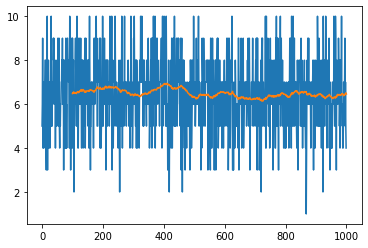

In [288]:
plt.plot(results[:, 1])
means = torch.tensor(results[:, 1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

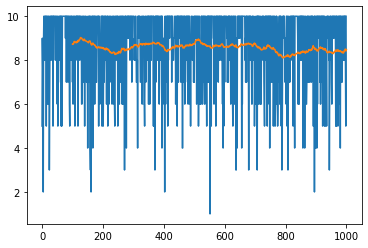

In [289]:
plt.plot(results[:, -1])
means = torch.tensor(results[:, -1], dtype=torch.float).unfold(0, 100, 1).mean(1).view(-1)
# means = torch.cat((torch.zeros(99), means))
plt.plot(np.arange(100, 100 + len(means)), means.numpy())
plt.show()

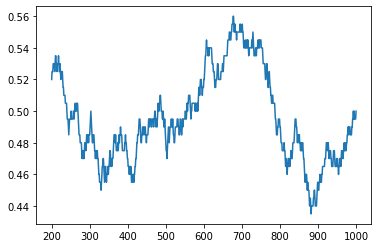

In [290]:
window = 200

wins = torch.tensor(results[:, -1]) >= LVL_CAP
wins = wins.unfold(0, window, 1).sum(1)
wins = wins.type(torch.FloatTensor)
plt.plot(np.arange(window, window+len(wins)), (wins / window).numpy())
plt.show()

In [291]:
np.sum([results[i][-1] >= LVL_CAP for i in range(len(results))]) / NUM_TRIALS

0.5

In [292]:
ff_agents[-1].skill

0.3

In [293]:
final_probs = ff_agents[-1].map_probs(NUM_PLAYERS)
final_probs

array([0.16342032, 0.16328563, 0.32173315, 0.21755725, 0.        ])

In [294]:
final_probs * (1 - ff_agents[-1].skill) / np.sum(final_probs)

array([0.1320955 , 0.13198663, 0.26006254, 0.17585533, 0.        ])